In [1]:
import re
import json
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

sns.set_theme()
sns.set_context("notebook", font_scale=0.8) 

%config InlineBackend.figure_format = 'retina'  
%config InlineBackend.print_figure_kwargs = {'dpi': 170}  

manually added following models to model_registry.json;
- qwen2.5-coder-32b-instruct
- mistral-7b-instruct-v0.2
- salamandra-7b-instruct
- meta-llama-3-70b-instruct-hf
- meta-llama-3-8b-instruct-hf

need verification for the following, if huggingface_local or inference-API? 
- yi-1.5-9b-chat
- qwen1.5-1.8b-chat
- qwen1.5-32b-chat
- qwen1.5-14b-chat
- yi-1.5-34b-chat
- dolphin-2.5-mixtral-8x7b
- qwen1.5-0.5b-chat
- nous-hermes-2-mixtral-8x7b-sft
- yi-1.5-6b-chat

In [2]:
output_dir = Path('Output')
output_dir.mkdir(exist_ok=True)

In [3]:
clemb_dir = Path('/Users/nidhirbhavsar/Desktop/WORK/Clembench/clembench/')
clemrun_dir = Path('/Users/nidhirbhavsar/Desktop/WORK/Clembench/clembench-runs/')

In [4]:
with open(clemb_dir / 'backends/model_registry.json') as f:
    reg_data = json.load(f) 

reg = pd.DataFrame(reg_data) 
reg['model_name'] = reg.model_name.str.lower()
reg['model_id'] = reg.model_id.str.lower()
reg['release_date'] = pd.to_datetime(reg['release_date'])
reg = reg.set_index('model_name')

In [5]:
versions = {
    'gemini-1.0-pro-002': 'gemini-1.0-pro',
    'gemini-1.5-flash-002': 'gemini-1.5-flash-latest',
    'gemini-1.5-pro-002': 'gemini-1.5-pro-latest'
}
reg.index = reg.index.map(lambda x: versions.get(x, x))

In [6]:
clemb = pd.read_csv(clemrun_dir / 'v1.6' / 'results.csv')
clemb = clemb.rename(columns={clemb.columns[0]: 'models'})

In [7]:
clemb.models = clemb.models.apply(lambda x: re.sub(r'(\w*)-t0.0.*', r'\1', x).lower())
clemb = clemb.set_index('models')

In [8]:
both = set(clemb.index).intersection(set(reg.index))
missing = set(clemb.index) - set(reg.index)

print("Overlapping:", len(both), "Missing:", len(missing))

Overlapping: 63 Missing: 9


In [9]:
missing

{'dolphin-2.5-mixtral-8x7b',
 'nous-hermes-2-mixtral-8x7b-sft',
 'qwen1.5-0.5b-chat',
 'qwen1.5-1.8b-chat',
 'qwen1.5-14b-chat',
 'qwen1.5-32b-chat',
 'yi-1.5-34b-chat',
 'yi-1.5-6b-chat',
 'yi-1.5-9b-chat'}

In [10]:
merged = pd.merge(reg, clemb, left_index=True, right_index=True, how='inner')

In [11]:
merged.head()

,model_id,backend,release_date,open_weight,parameters,supports_images,support_multiple_images,estimated_parameters,o1_model,huggingface_id,premade_chat_template,eos_to_cull,custom_chat_template,slow_tokenizer,output_split_prefix,requires_api_key,filename,bos_string,eos_string,additional_files,model_class,model_config,processor_class,processor_config,prompt,response,do_sample,supports_multiple_images,trust_remote_code,automodel_type,use_tokenizer,use_bf16,not_distributed,low_cpu_mem_usage,use_vllm,tokenizer_mode,vllm_context,number_gpus,context_limit,"-, clemscore","all, Average % Played","all, Average Quality Score","imagegame, % Played","imagegame, Quality Score","imagegame, Quality Score (std)","privateshared, % Played","privateshared, Quality Score","privateshared, Quality Score (std)","referencegame, % Played","referencegame, Quality Score","referencegame, Quality Score (std)","taboo, % Played","taboo, Quality Score","taboo, Quality Score (std)","wordle, % Played","wordle, Quality Score","wordle, Quality Score (std)","wordle_withclue, % Played","wordle_withclue, Quality Score","wordle_withclue, Quality Score (std)","wordle_withcritic, % Played","wordle_withcritic, Quality Score","wordle_withcritic, Quality Score (std)"
model_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
meta-llama-3-8b-instruct-hf,meta-llama/meta-llama-3-8b-instruct,openai_compatible,2024-04-18,True,8B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.99,76.10,26.27,0.0,NaN,NaN,96.0,58.91,30.05,100.00,46.11,49.99,100.00,37.78,45.08,86.67,0.00,0.00,83.33,14.00,33.91,66.67,0.83,3.73
meta-llama-3-70b-instruct-hf,meta-llama/meta-llama-3-70b-instruct,openai_compatible,2024-04-18,True,70B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.11,80.72,43.50,0.0,NaN,NaN,100.0,84.37,13.69,100.00,64.44,48.00,91.67,70.30,39.37,90.00,1.85,6.81,96.67,14.37,32.34,86.67,25.64,39.08
meta-llama-3.1-405b-instruct-turbo,meta-llama/meta-llama-3.1-405b-instruct-turbo,openai_compatible,2024-07-23,True,405B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.11,90.12,57.82,62.5,94.12,12.55,100.0,84.24,29.65,100.00,80.00,40.11,95.00,76.61,36.03,93.33,7.14,12.72,93.33,29.70,34.87,86.67,32.95,35.63
mixtral-8x22b-instruct-v0.1,mistralai/mixtral-8x22b-instruct-v0.1,openai_compatible,2024-04-17,True,141B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.69,52.14,24.33,0.0,NaN,NaN,0.0,NaN,NaN,100.00,36.67,48.32,58.33,40.00,49.71,96.67,0.00,0.00,60.00,15.00,33.30,50.00,30.00,41.40
mixtral-8x7b-instruct-v0.1,mistralai/mixtral-8x7b-instruct-v0.1,openai_compatible,2023-12-11,True,46.7B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.17,47.62,17.15,0.0,NaN,NaN,0.0,NaN,NaN,61.67,41.44,49.49,51.67,9.68,30.05,96.67,0.00,0.00,76.67,19.13,35.28,46.67,15.48,36.08


In [12]:
merged.columns

Index(['model_id', 'backend', 'release_date', 'open_weight', 'parameters',
       'supports_images', 'support_multiple_images', 'estimated_parameters',
       'o1_model', 'huggingface_id', 'premade_chat_template', 'eos_to_cull',
       'custom_chat_template', 'slow_tokenizer', 'output_split_prefix',
       'requires_api_key', 'filename', 'bos_string', 'eos_string',
       'additional_files', 'model_class', 'model_config', 'processor_class',
       'processor_config', 'prompt', 'response', 'do_sample',
       'supports_multiple_images', 'trust_remote_code', 'automodel_type',
       'use_tokenizer', 'use_bf16', 'not_distributed', 'low_cpu_mem_usage',
       'use_vllm', 'tokenizer_mode', 'vllm_context', 'number_gpus',
       'context_limit', '-, clemscore', 'all, Average % Played',
       'all, Average Quality Score', 'imagegame, % Played',
       'imagegame, Quality Score', 'imagegame, Quality Score (std)',
       'privateshared, % Played', 'privateshared, Quality Score',
       'private

### Combined Barplots

In [13]:
# based on https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html , 
#  with a lot less penguin
def barplot_maker(fig, ax, groups, features,
                  ylabel='', title='', width=0.25, ylim=(0,100),
                  rotation=45,
                  show_labels=True, show_ylabel=True, show_title=True, show_legend=True):
    x = np.arange(len(groups))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    for attribute, value in features.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, value, width, label=attribute)
        if show_labels:
            ax.bar_label(rects, padding=3)
        multiplier += 1
        #break

    # Add some text for labels, title and custom x-axis tick labels, etc.
    if show_ylabel:
        ax.set_ylabel(ylabel)
    if show_title:
        ax.set_title(title)
    ax.set_xticks(x + width, groups, rotation=rotation, rotation_mode='anchor', horizontalalignment='right')
    if show_legend:
        ax.legend(loc='upper left', ncol=3)
    ax.set_ylim(ylim)

#### Across models, show a few features

In [14]:
def df_to_dict(df, columns):
    return {col: df.loc[:, col].values for col in columns}

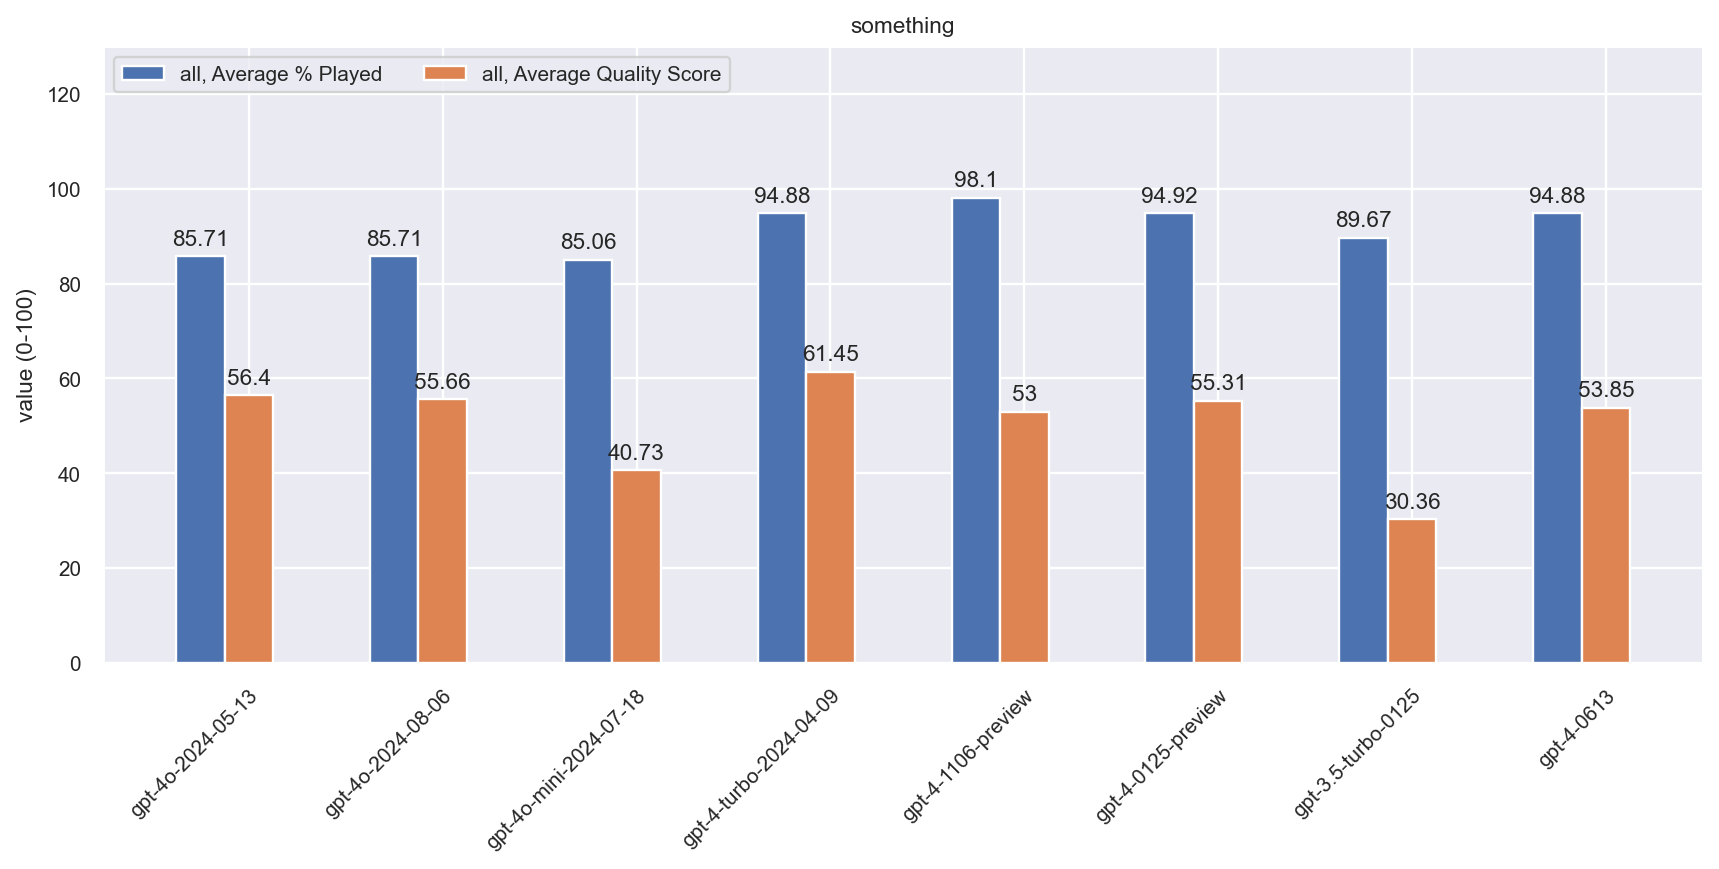

In [15]:
filtered_df = merged[merged.index.str.contains('gpt')]
metrics = ['all, Average % Played', 'all, Average Quality Score']

plot_data = df_to_dict(filtered_df, metrics)
models = filtered_df.index

ylabel = 'value (0-100)'
title = 'something'

fig, ax = plt.subplots(layout='constrained')
barplot_maker(fig, ax, models, plot_data, ylabel, title, ylim=(0, 130))
fig.set_size_inches(10, 5)

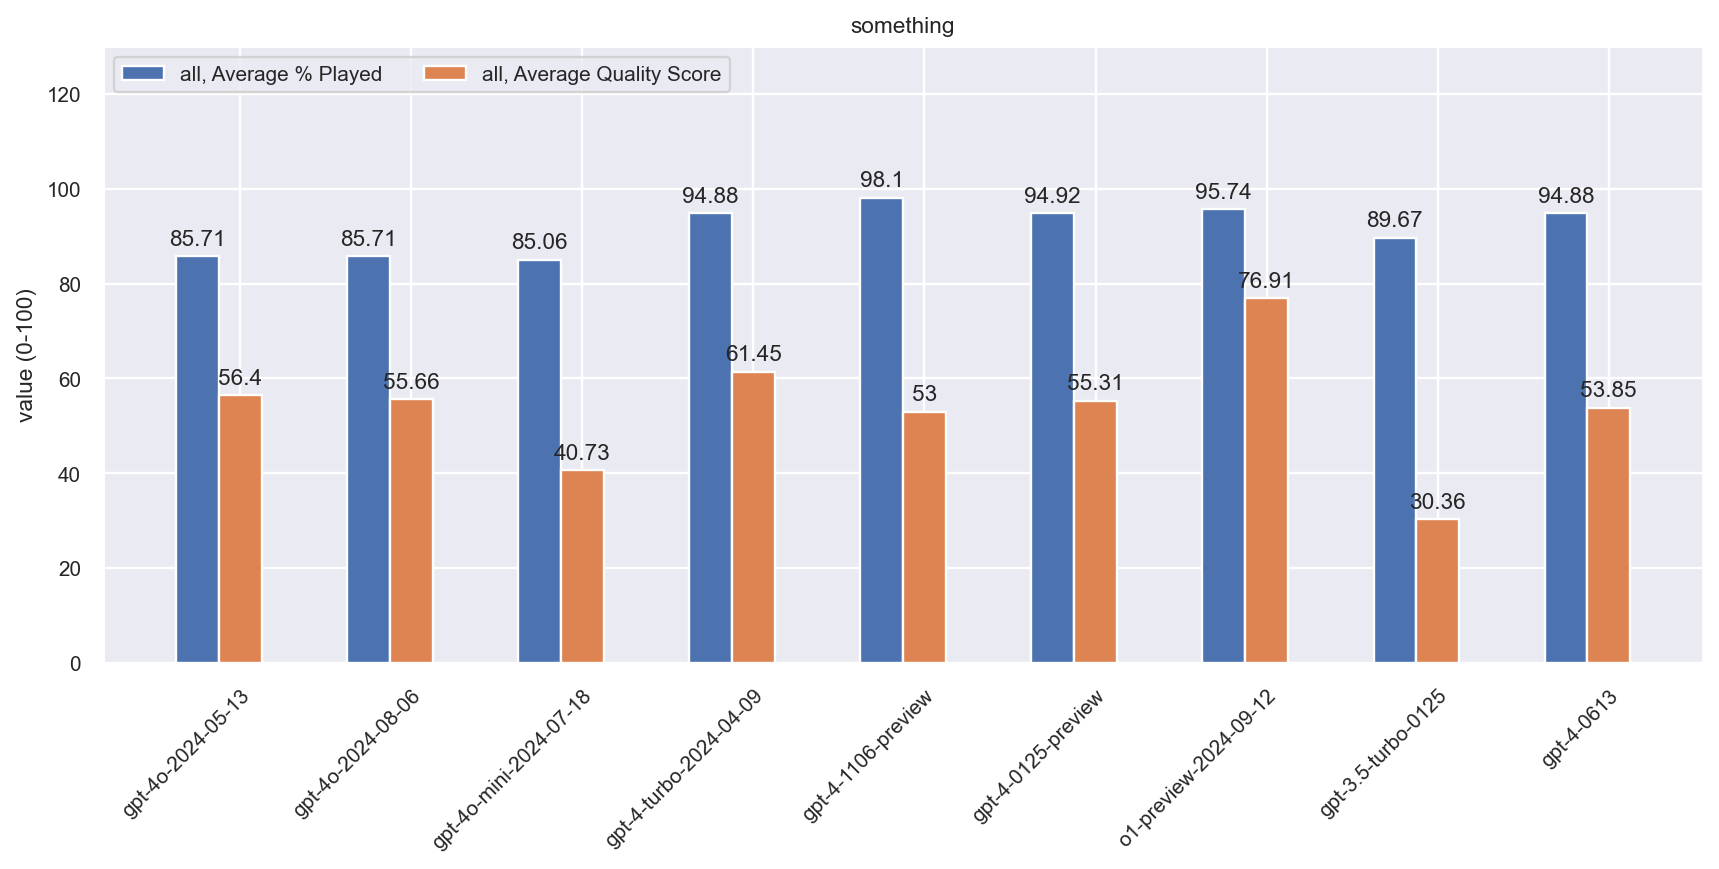

In [16]:
filtered_df = merged[merged.backend == 'openai']
metrics = ['all, Average % Played', 'all, Average Quality Score']

plot_data = df_to_dict(filtered_df, metrics)
models = filtered_df.index

ylabel = 'value (0-100)'
title = 'something'

fig, ax = plt.subplots(layout='constrained')
barplot_maker(fig, ax, models, plot_data, ylabel, title, ylim=(0, 130))
fig.set_size_inches(10, 5)

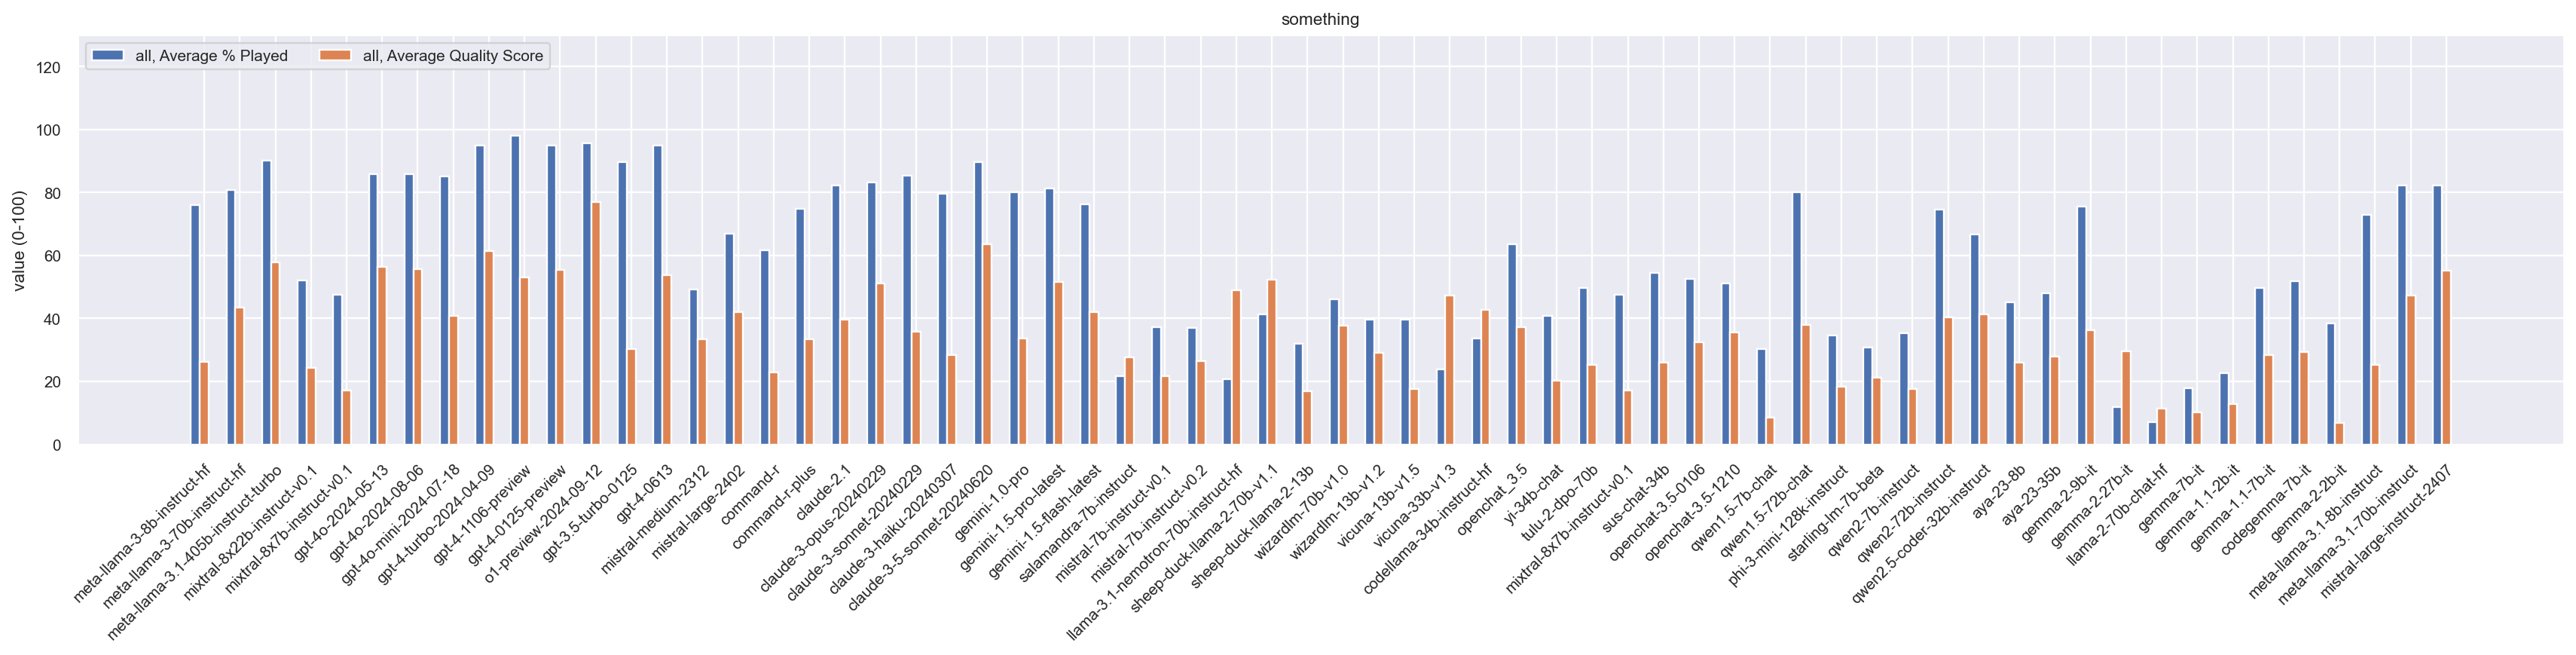

In [17]:
attributes = ['all, Average % Played', 'all, Average Quality Score']
out_dict = df_to_dict(merged, attributes)
models = merged.index  

ylabel = 'value (0-100)'
title = 'something'

fig, ax = plt.subplots(layout='constrained')
barplot_maker(fig, ax, models, out_dict, ylabel=ylabel, title=title, ylim=(0, 130), show_labels=False)
fig.set_size_inches(20, 5)

### Within model, show feature pairs

Different view: A single model. Each group is a game. So the two features are '%-played' and 'quality', for each game...

In [18]:
groups = [
    'imagegame', 'privateshared', 'referencegame', 
    'taboo', 'wordle', 'wordle_withclue', 'wordle_withcritic'
]
attributes = ['% Played', 'Quality Score']

In [19]:
def extract_data(model, df, groups, attributes):
    row = df[df.index == model]
    out_dict = {attr: [row[f"{group}, {attr}"].values[0] for group in groups] for attr in attributes}
    return out_dict

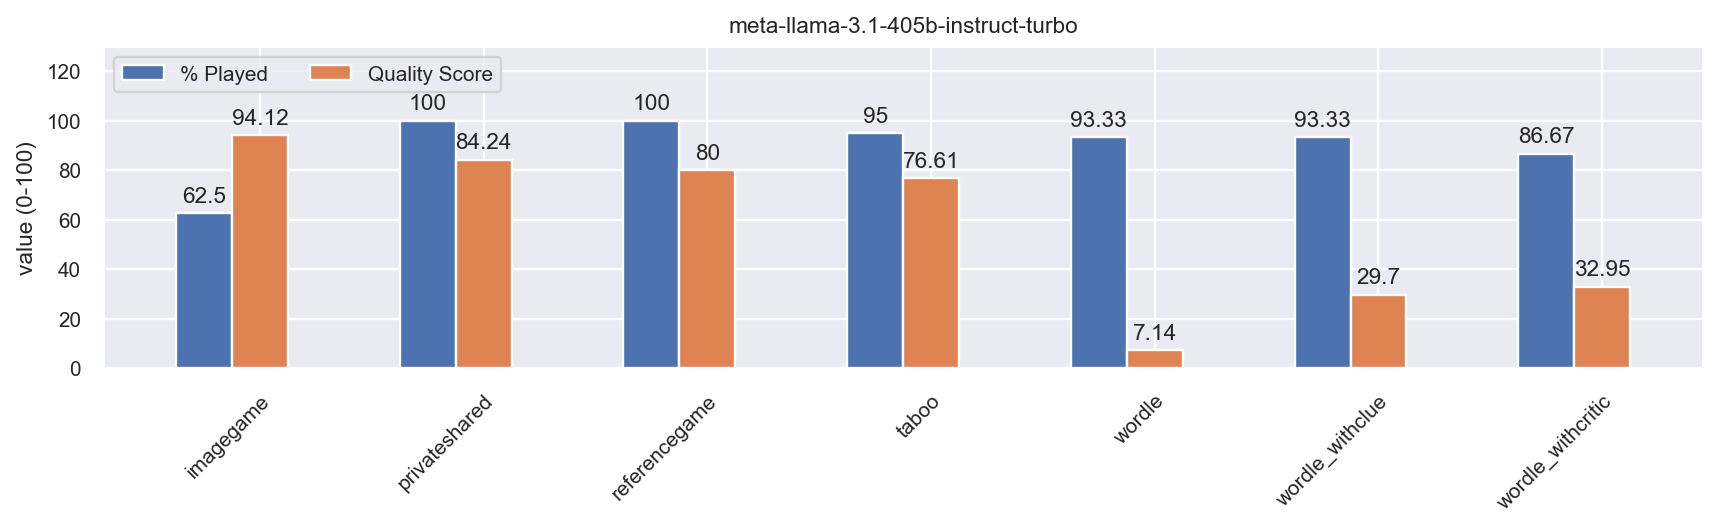

In [20]:
this_model = 'meta-llama-3.1-405b-instruct-turbo'
out_dict = extract_data(this_model, merged, groups, attributes)

ylabel = 'value (0-100)'
title = this_model

fig, ax = plt.subplots(layout='constrained')
barplot_maker(fig, ax, groups, out_dict, ylabel=ylabel, title=title, ylim=(0, 130))
fig.set_size_inches(10, 3)

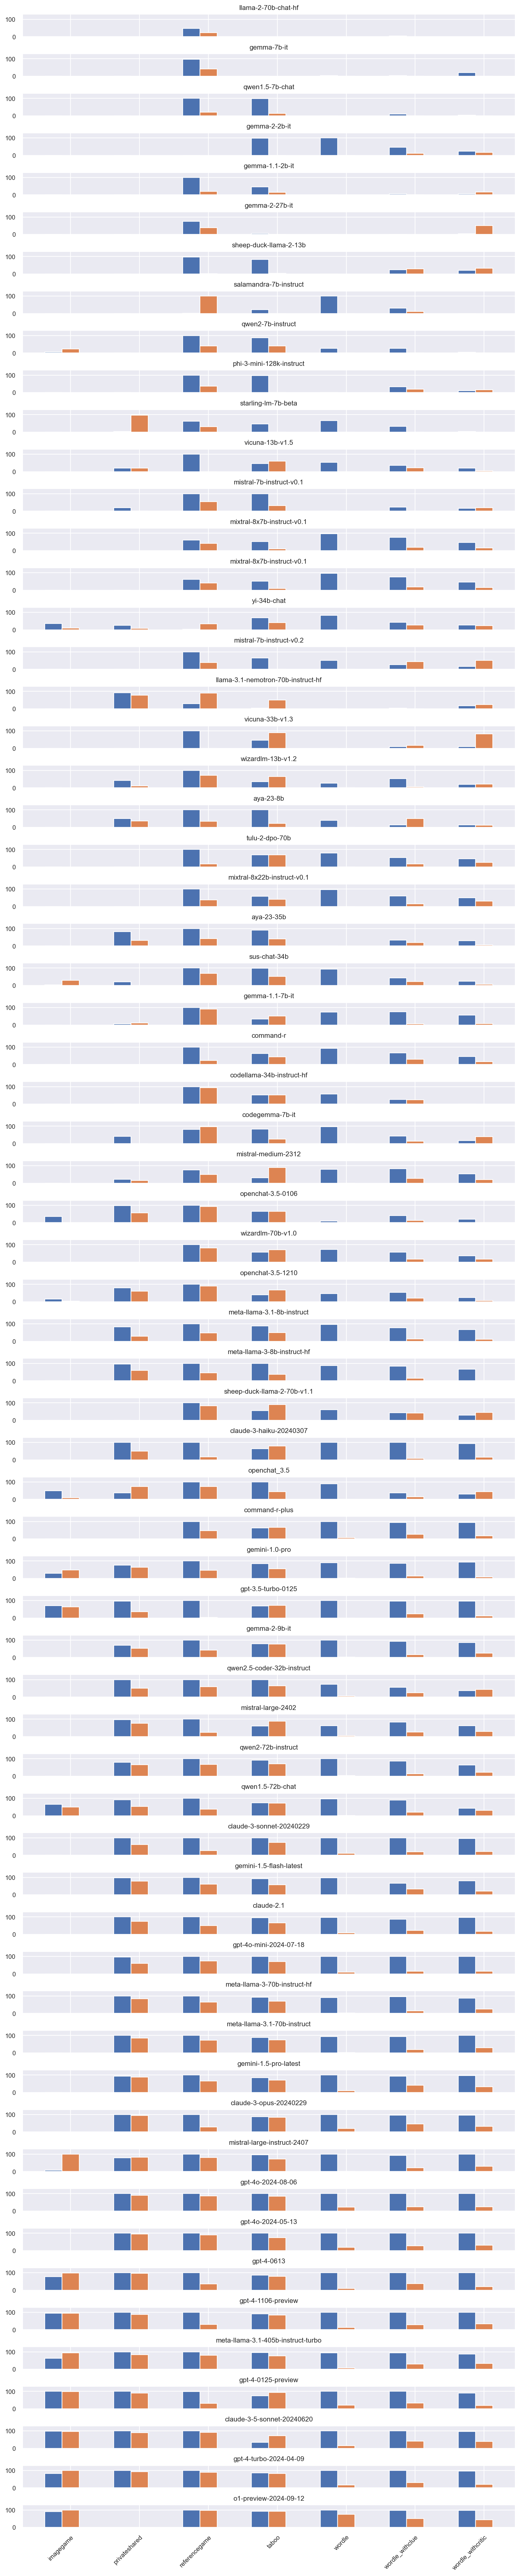

In [21]:
# Plot for all models
fig, axes = plt.subplots(layout='constrained', nrows=len(merged), ncols=1, sharex=True)
fig.set_size_inches(10, 50)

for ax, model in zip(axes, merged.sort_values(by='-, clemscore').index):
    out_dict = extract_data(model, merged, groups, attributes)
    barplot_maker(fig, ax, groups, out_dict, ylabel='value (0-100)', title=model, ylim=(0, 130),
                  show_labels=False, show_ylabel=False, show_legend=False)

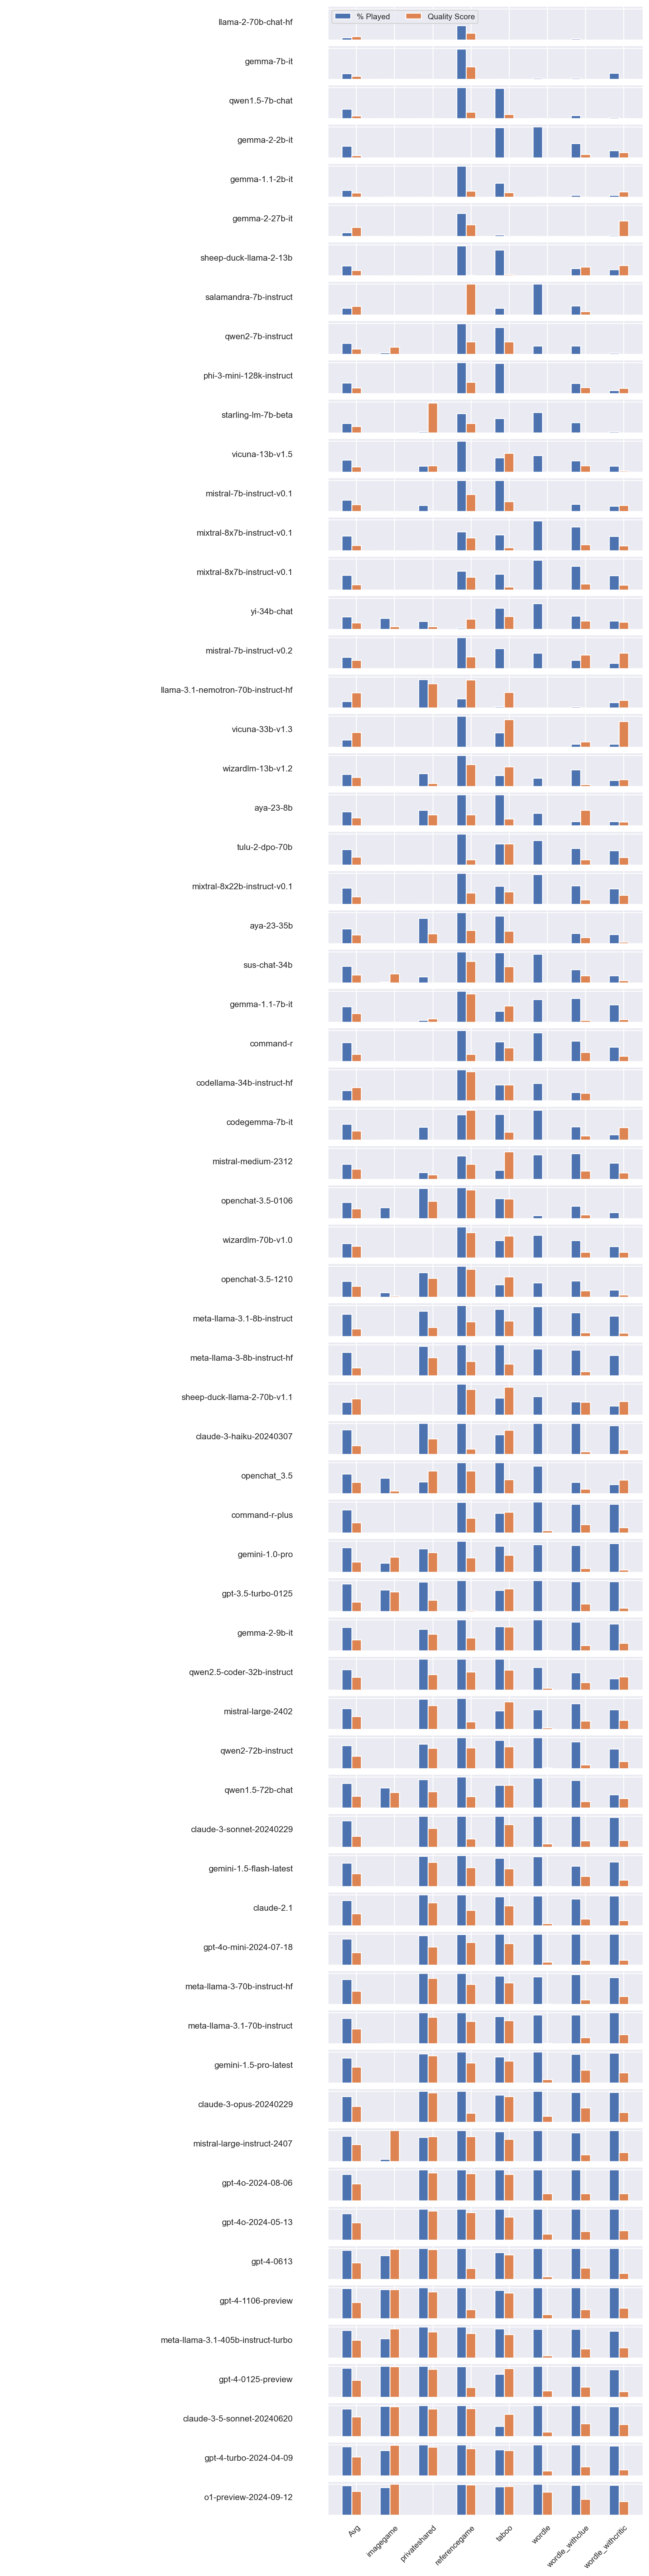

In [22]:
# Setup plot
fig, axes = plt.subplots(layout='constrained', nrows=len(merged), ncols=2,
                         sharex=True, sharey=True)

# Rename columns if needed
mcop = merged.rename(columns={
    'all, Average % Played': 'Avg, % Played',
    'all, Average Quality Score': 'Avg, Quality Score'
})

groups = [
    'Avg', 'imagegame', 'privateshared', 'referencegame',
    'taboo', 'wordle', 'wordle_withclue', 'wordle_withcritic'
]
attributes = ['% Played', 'Quality Score']

# Plot for each model
for idx, model in enumerate(mcop.sort_values(by='-, clemscore').index.values):
    # Extract data
    row = mcop[mcop.index == model]
    out_dict = {attr: [row[f"{group}, {attr}"].values[0] for group in groups] 
                for attr in attributes}
    
    # Left column: model name
    axes[idx, 0].text(7, 50, model, horizontalalignment='right')
    axes[idx, 0].axis('off')
    
    # Right column: bar plot
    barplot_maker(fig, axes[idx, 1], groups, out_dict,
                  ylabel='value (0-100)', title=model, ylim=(0, 110),
                  show_labels=False, show_ylabel=False, show_title=False,
                  show_legend=(idx == 0))

fig.set_size_inches(10, 40)

In [23]:
merged.index.values

array(['meta-llama-3-8b-instruct-hf', 'meta-llama-3-70b-instruct-hf',
       'meta-llama-3.1-405b-instruct-turbo',
       'mixtral-8x22b-instruct-v0.1', 'mixtral-8x7b-instruct-v0.1',
       'gpt-4o-2024-05-13', 'gpt-4o-2024-08-06', 'gpt-4o-mini-2024-07-18',
       'gpt-4-turbo-2024-04-09', 'gpt-4-1106-preview',
       'gpt-4-0125-preview', 'o1-preview-2024-09-12',
       'gpt-3.5-turbo-0125', 'gpt-4-0613', 'mistral-medium-2312',
       'mistral-large-2402', 'command-r', 'command-r-plus', 'claude-2.1',
       'claude-3-opus-20240229', 'claude-3-sonnet-20240229',
       'claude-3-haiku-20240307', 'claude-3-5-sonnet-20240620',
       'gemini-1.0-pro', 'gemini-1.5-pro-latest',
       'gemini-1.5-flash-latest', 'salamandra-7b-instruct',
       'mistral-7b-instruct-v0.1', 'mistral-7b-instruct-v0.2',
       'llama-3.1-nemotron-70b-instruct-hf',
       'sheep-duck-llama-2-70b-v1.1', 'sheep-duck-llama-2-13b',
       'wizardlm-70b-v1.0', 'wizardlm-13b-v1.2', 'vicuna-13b-v1.5',
       'vicuna-33b

In [24]:
mcop = merged.rename(columns={'all, Average % Played': 'Avg, % Played',
                            'all, Average Quality Score': 'Avg, Quality Score'})
mcop = mcop.sort_values(by='-, clemscore')
models_per_plot = len(mcop) // 3

def plot_section(models_df, output_path):
    fig, axes = plt.subplots(layout='constrained', nrows=len(models_df), ncols=2,
                            sharex=True, sharey=True)
    
    groups = ['Avg', 'imagegame', 'privateshared', 'referencegame',
              'taboo', 'wordle', 'wordle_withclue', 'wordle_withcritic']
    attributes = ['% Played', 'Quality Score']

    for ax_row_counter, this_model in enumerate(models_df.index.values):
        row = models_df[models_df.index == this_model]
        out_dict = {attr: [row[f"{group}, {attr}"].values[0] 
                   for group in groups] for attr in attributes}
        
        # Left column: model names
        axes[ax_row_counter, 0].text(7, 50, this_model, horizontalalignment='right')
        axes[ax_row_counter, 0].axis('off')
        
        # Right column: bar plot
        barplot_maker(fig, axes[ax_row_counter, 1], groups, out_dict,
                     ylabel='value (0-100)', title=this_model, ylim=(0,105),
                     rotation=20, show_labels=False, show_ylabel=False, 
                     show_title=False, show_legend=(ax_row_counter == 0))

    fig.set_size_inches(10, len(models_df))
    plt.savefig(output_path, bbox_inches='tight')

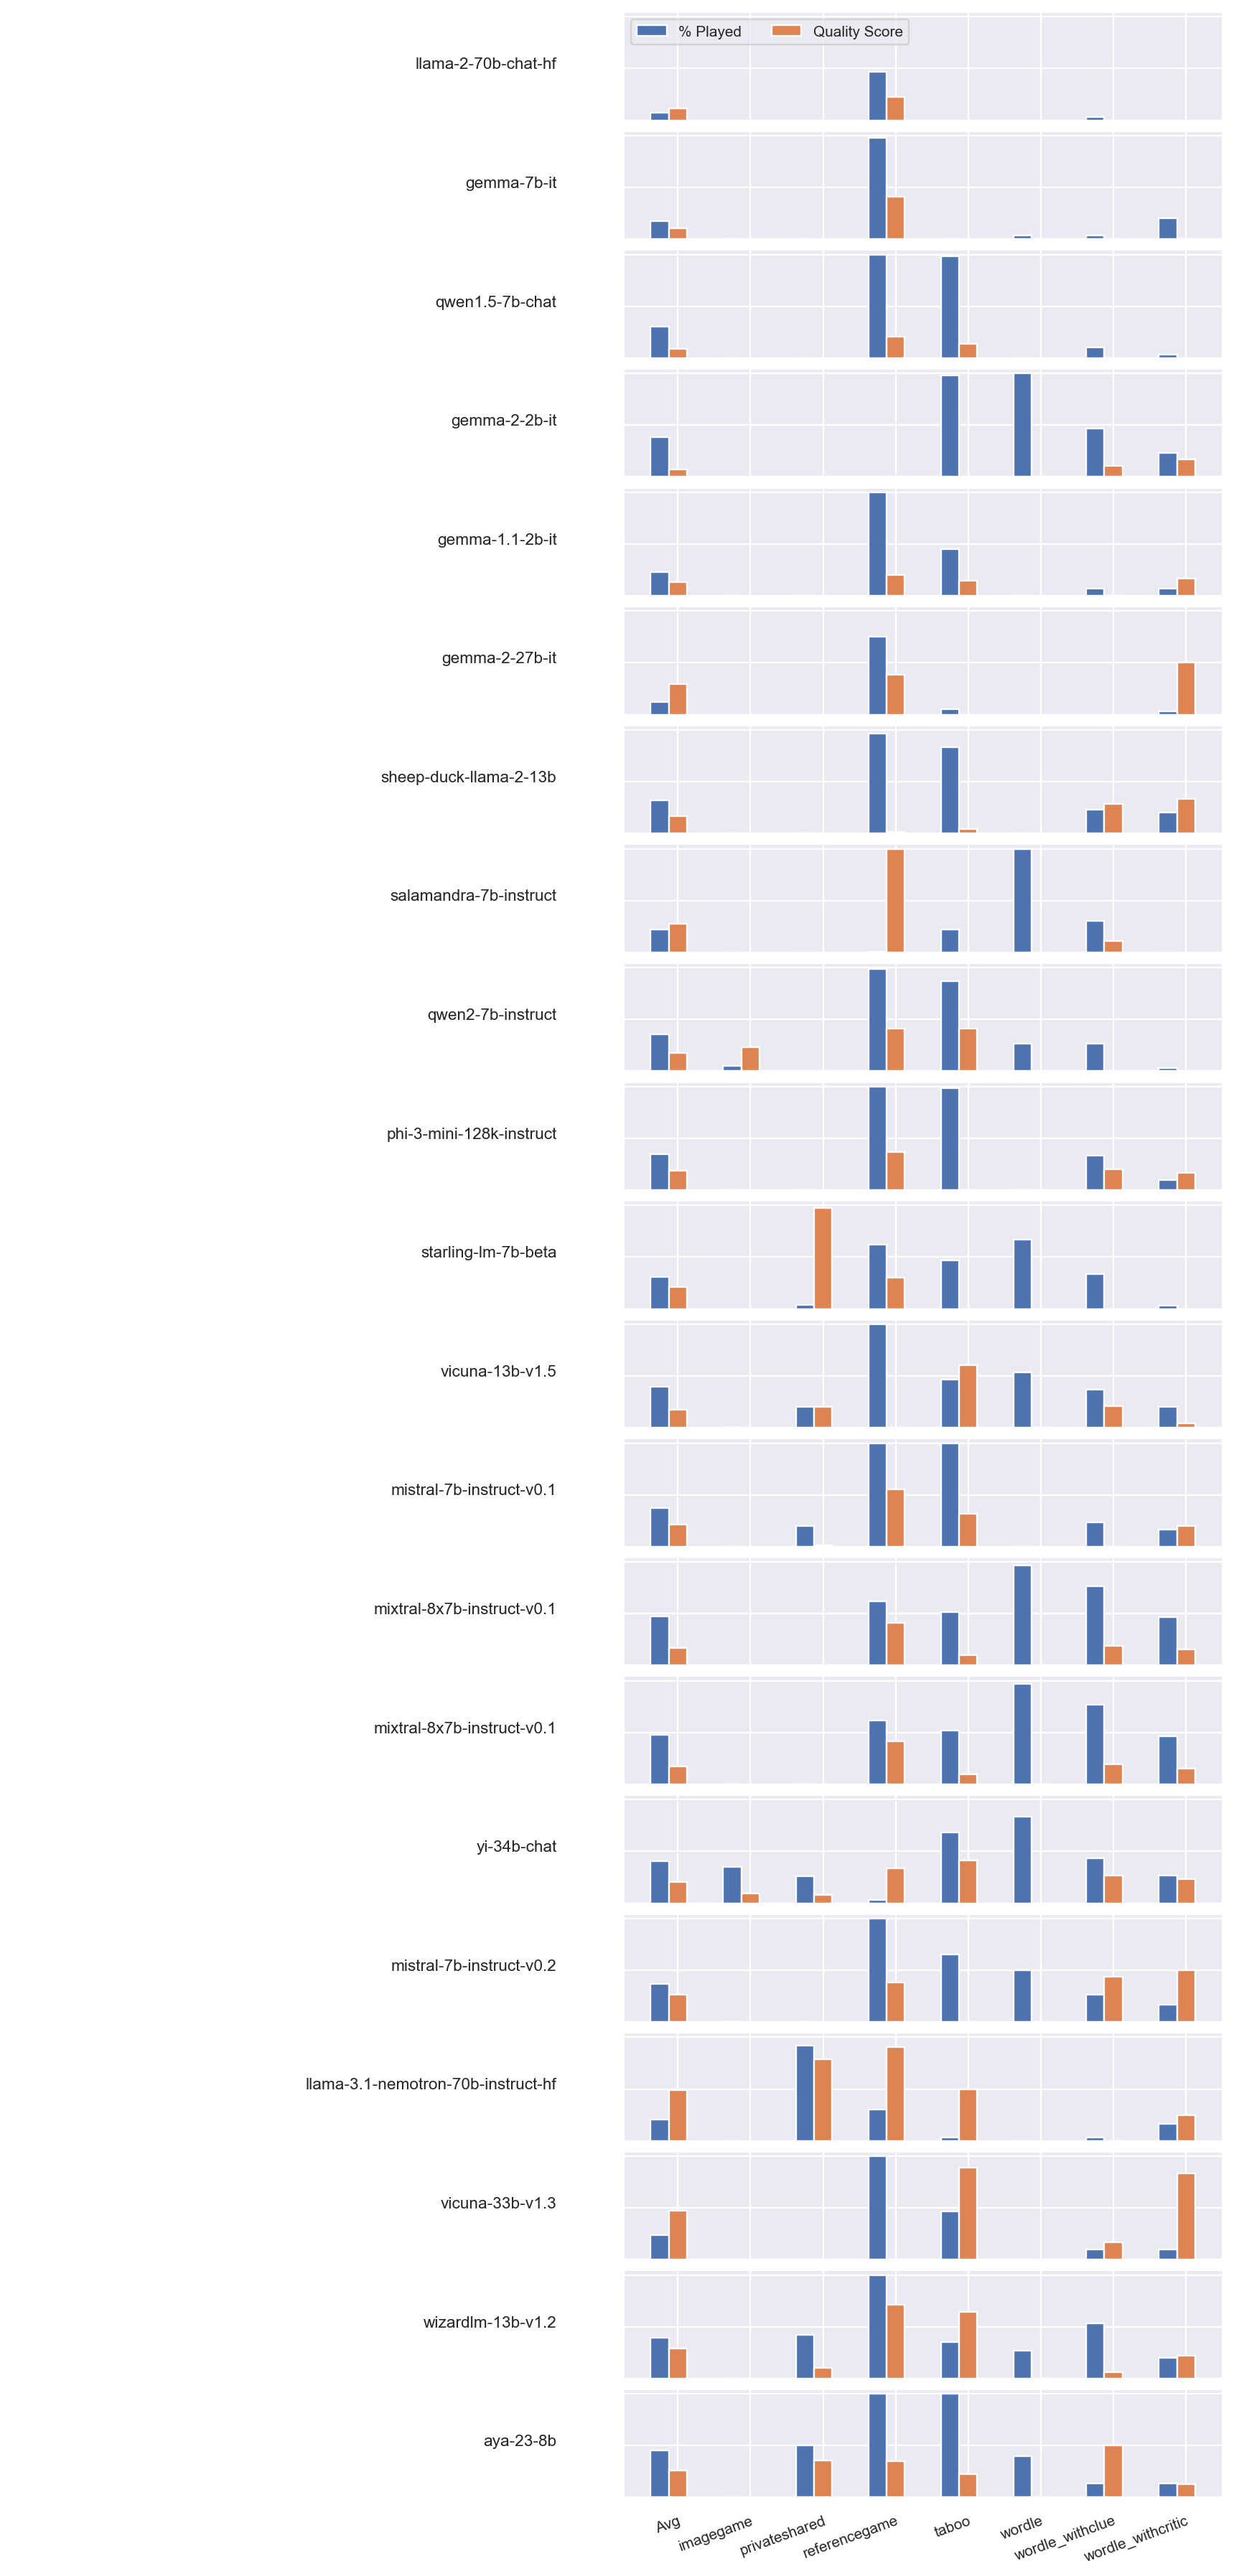

In [25]:
plot_section(mcop[:models_per_plot], output_dir / 'all_profiles_1.png')

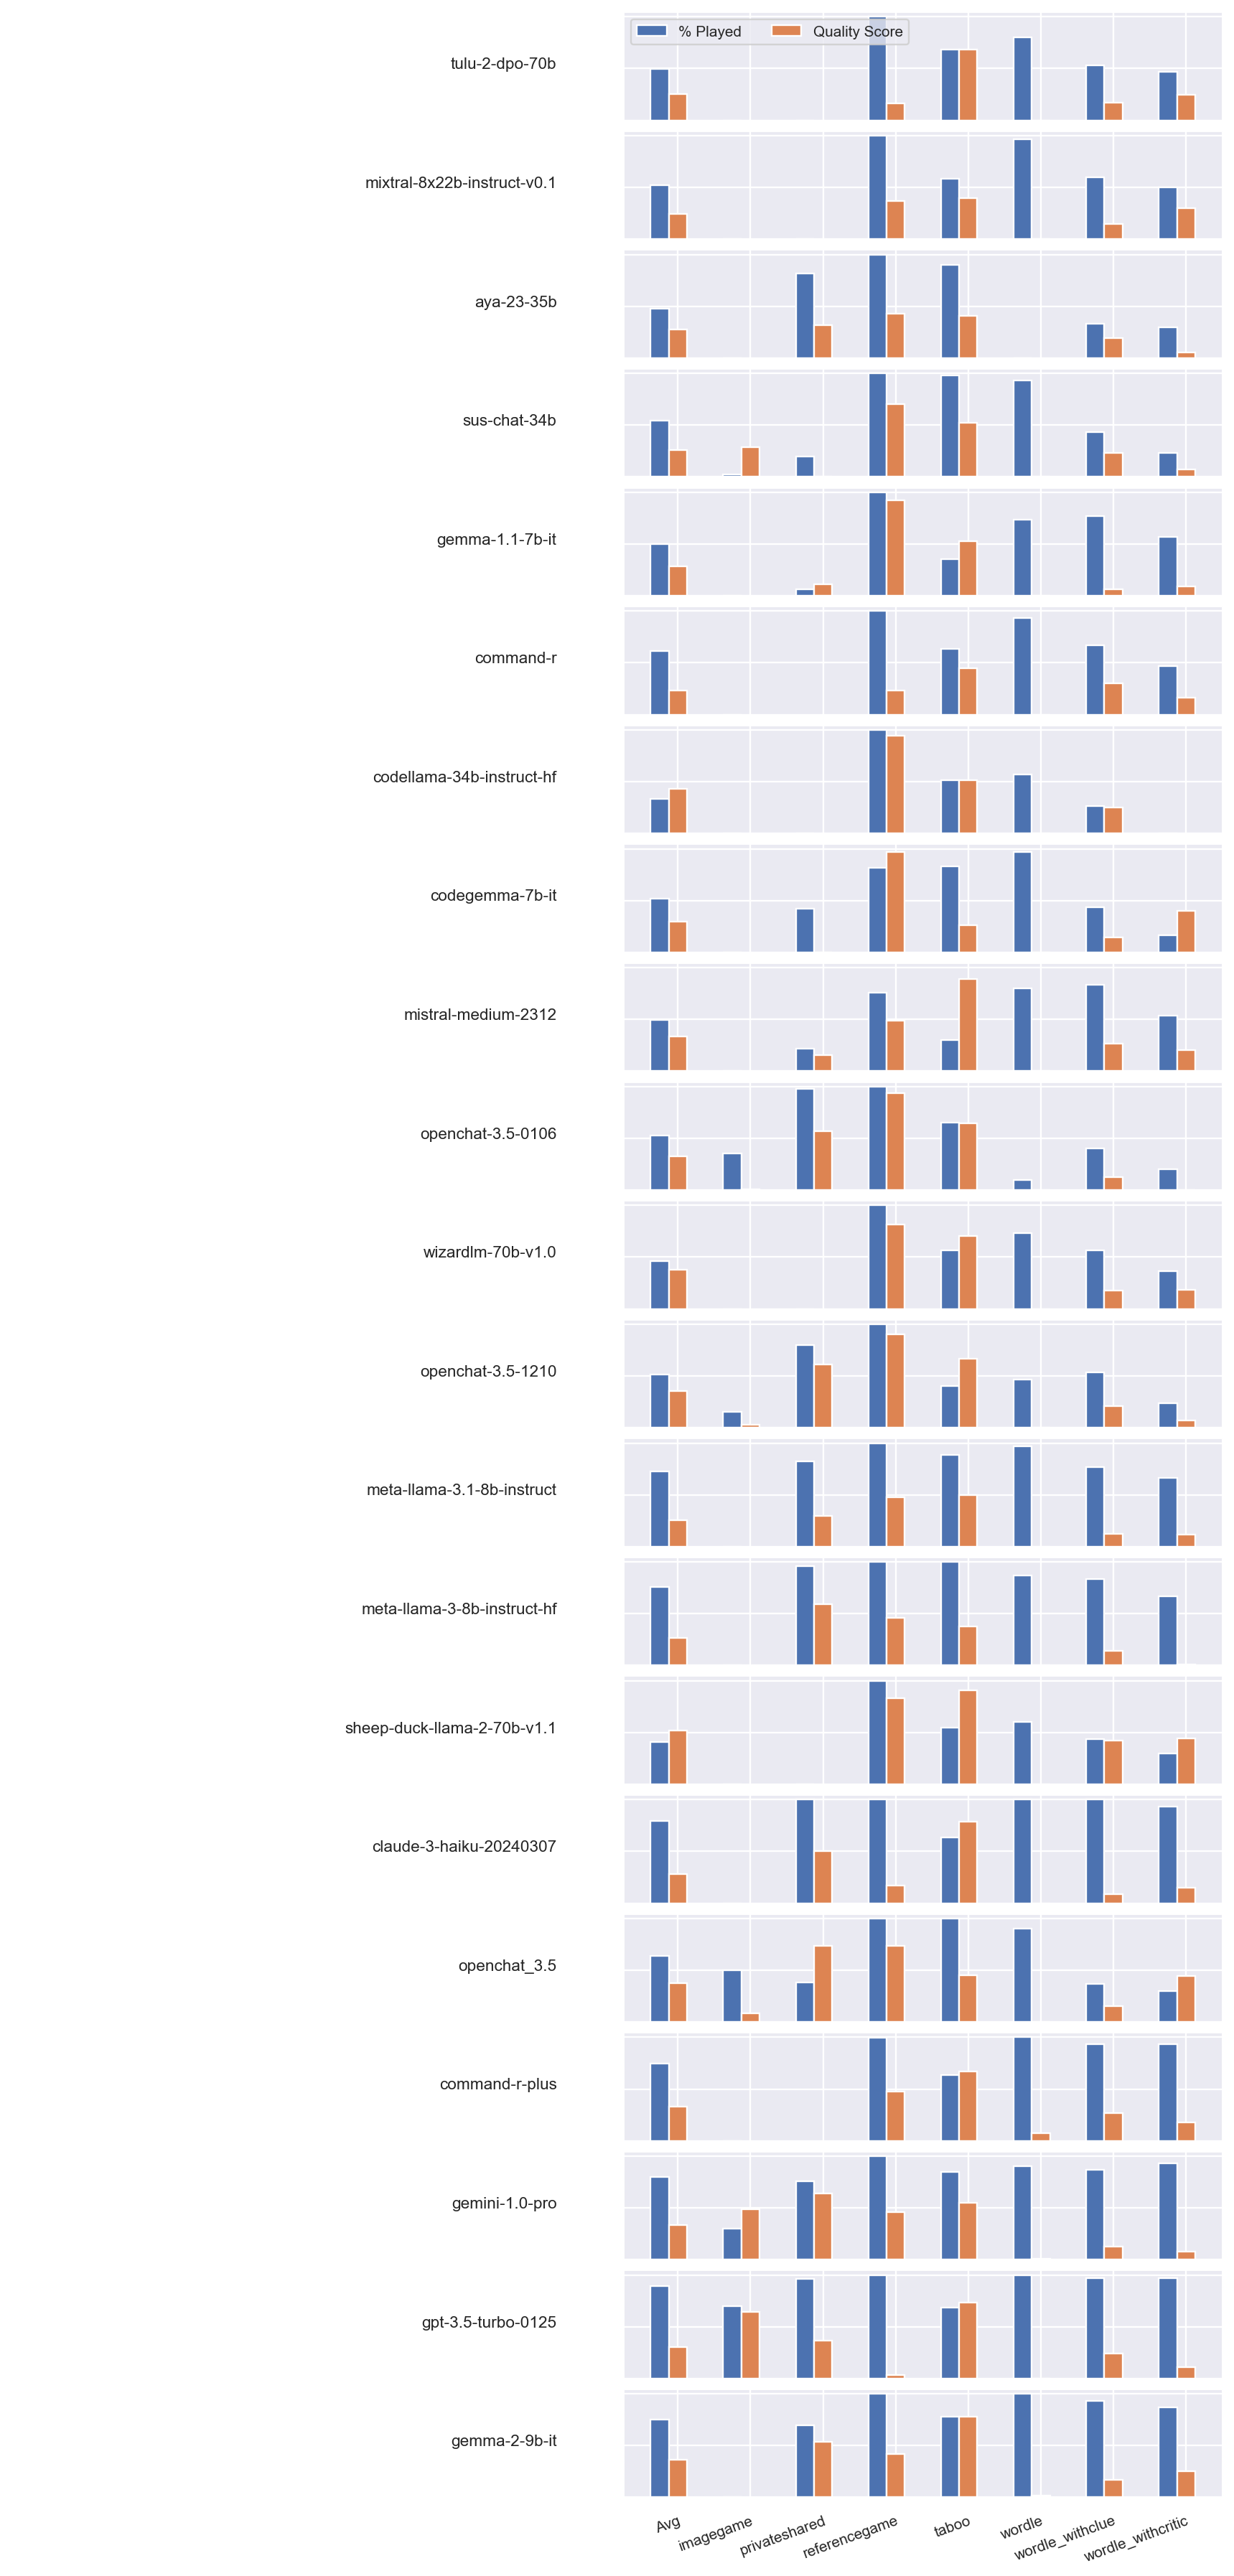

In [26]:
plot_section(mcop[models_per_plot:2*models_per_plot], output_dir / 'all_profiles_2.png')

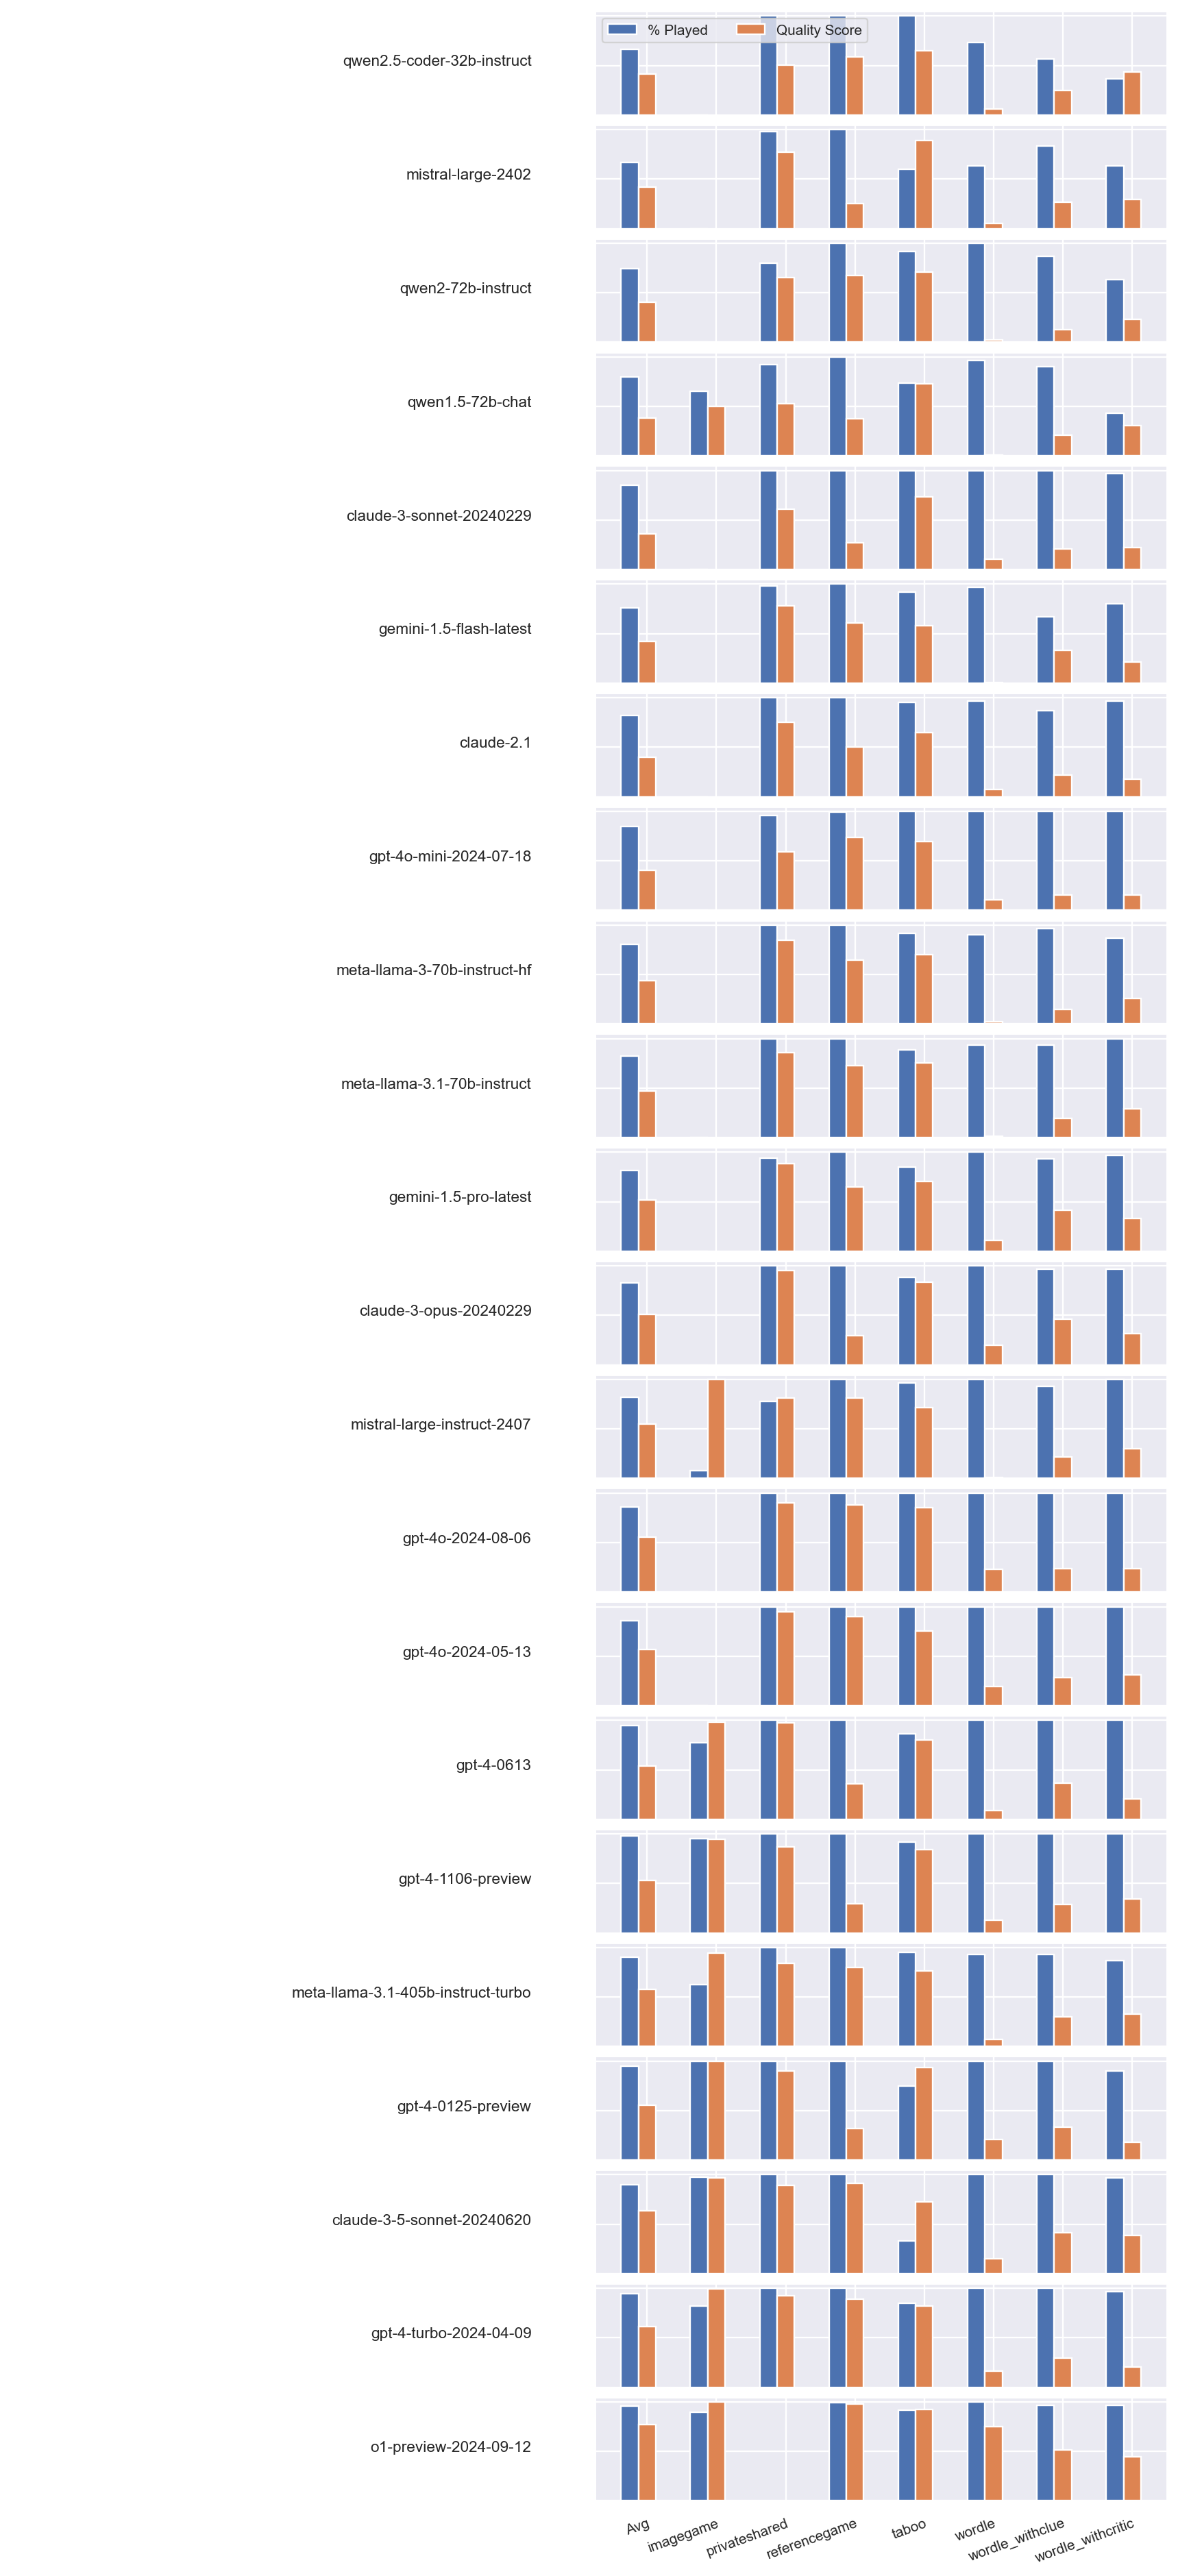

In [27]:
plot_section(mcop[2*models_per_plot:], output_dir / 'all_profiles_3.png')

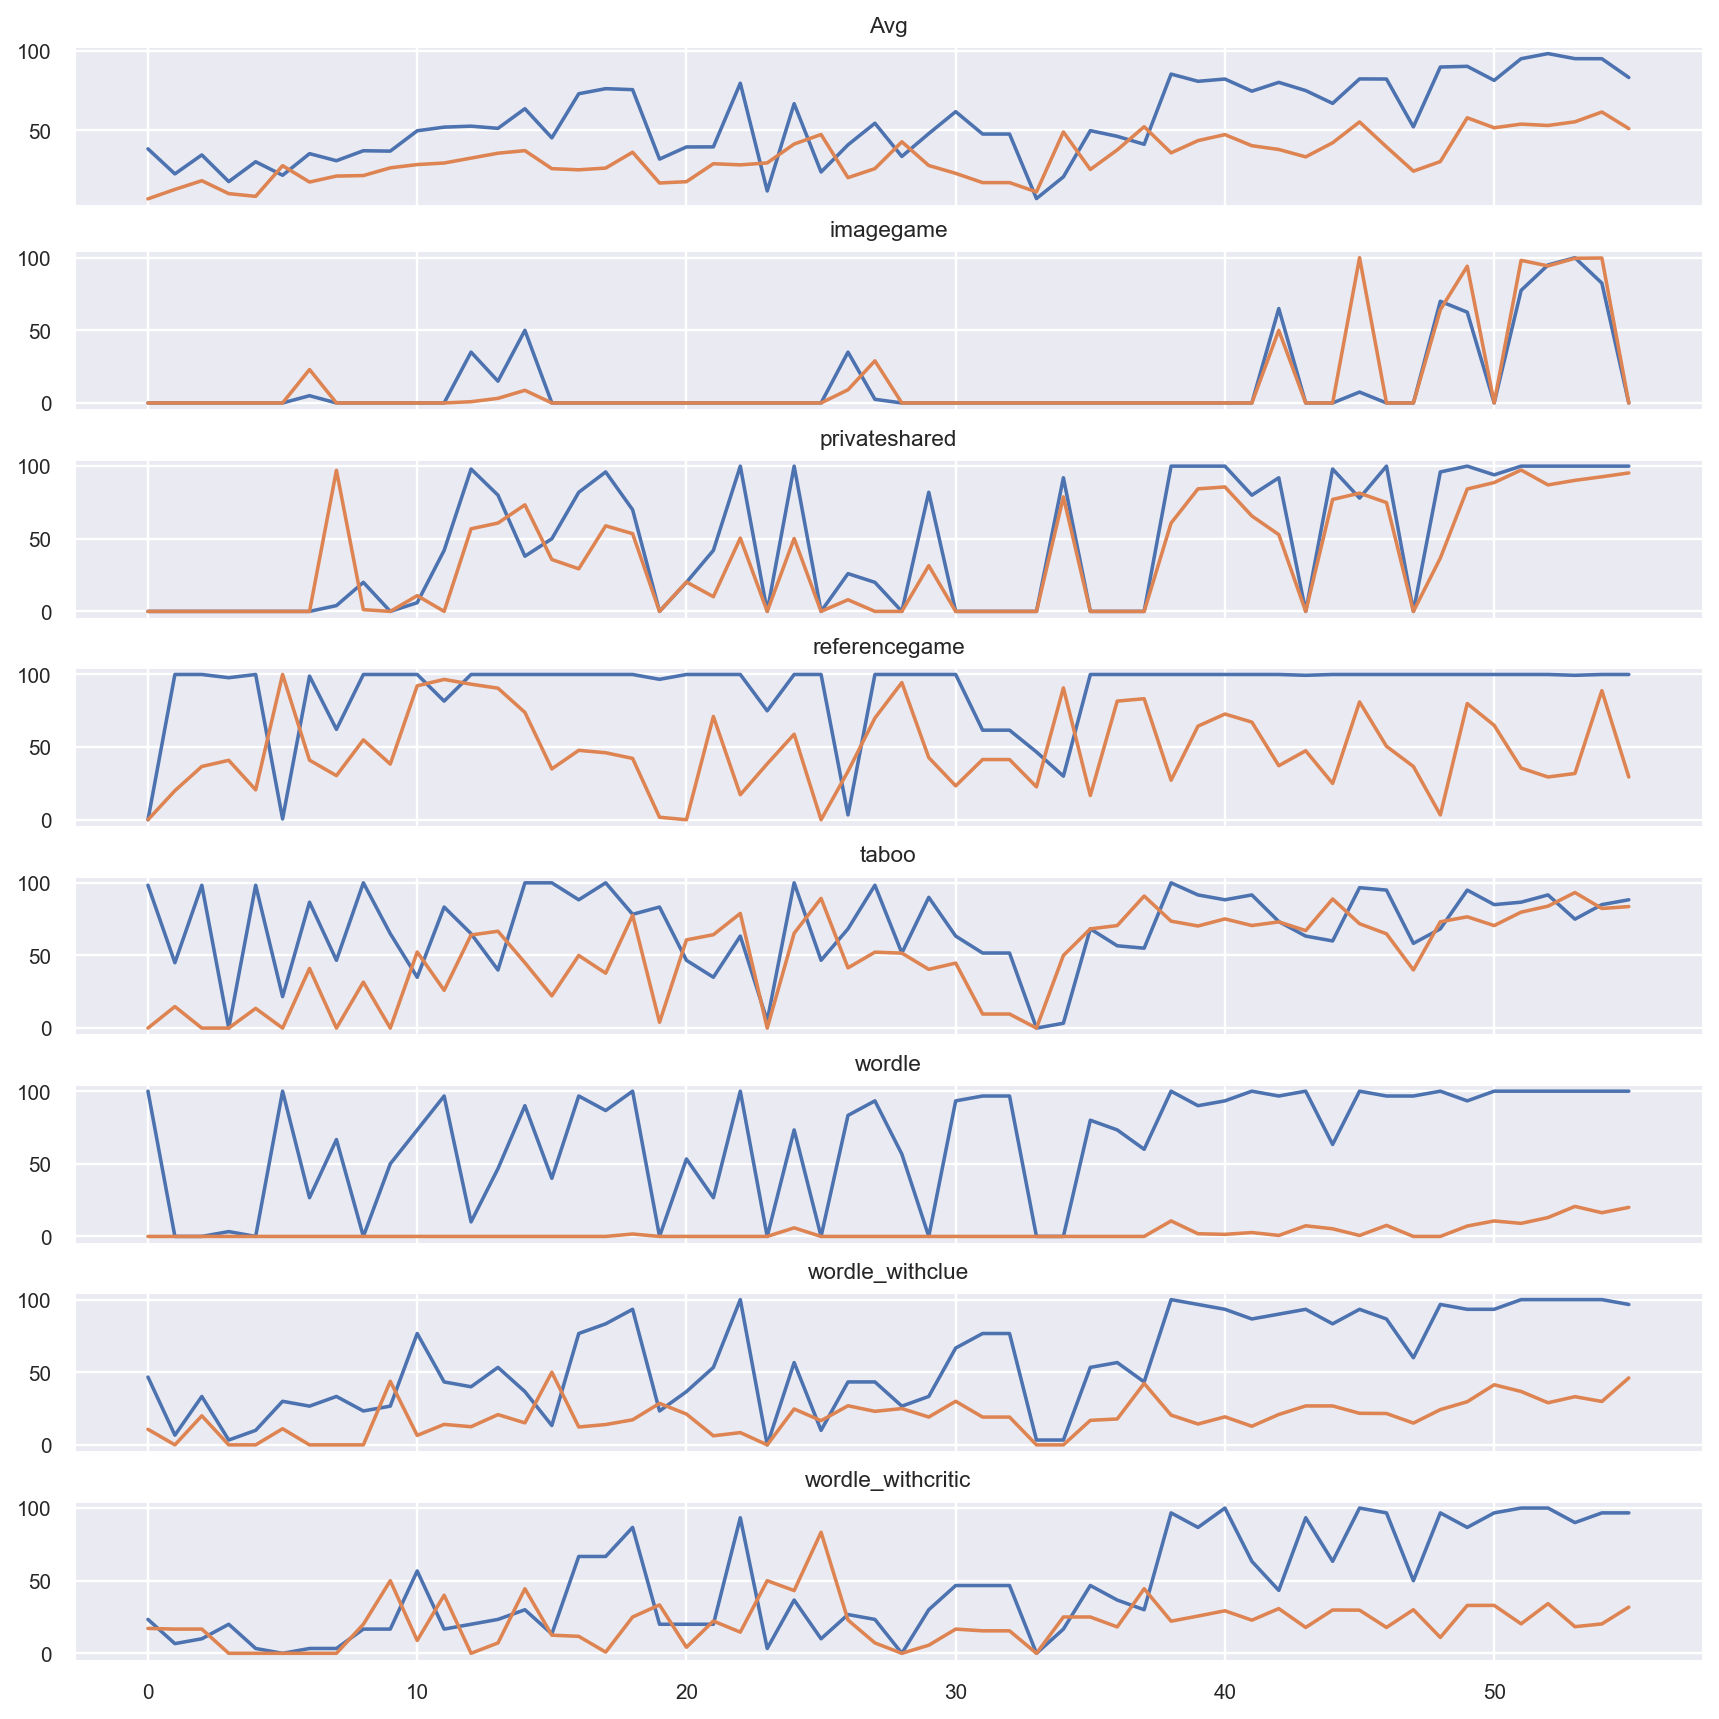

In [28]:
def convert_to_billions(param):
    if 'T' in param:
        return float(param.replace('T', '')) * 1000 
    elif 'B' in param:
        return float(param.replace('B', ''))  
    return np.nan  

mcop['parameters'] = mcop['parameters'].apply(convert_to_billions)

mcop = mcop.dropna(subset=['parameters'])

groups = [
    'Avg', 'imagegame', 'privateshared', 'referencegame',
    'taboo', 'wordle', 'wordle_withclue', 'wordle_withcritic'
]
attributes = ['% Played', 'Quality Score']

# Create subplots
fig, axes = plt.subplots(layout='constrained', nrows=len(groups), ncols=1, sharex=True)

for n, this_group in enumerate(groups):
    plot_cols = [f"{this_group}, {a}" for a in attributes]

    ax = (
        mcop
        .fillna(value={v: 0 for v in plot_cols})
        .sort_values(by=['parameters', '-, clemscore'], ascending=[True, True])
        .reset_index(drop=True)
        .plot.line(use_index=True, y=plot_cols, legend=False, title=this_group, ax=axes[n])
    )

fig.set_size_inches(10, 10)
plt.savefig(output_dir / 'dynamics.png', bbox_inches='tight')